In [4]:
# -*- coding: utf-8 -*-

"""
Python 3
19 / 07 / 2024
@author: z_tjona

"I find that I don't understand things unless I try to program them."
-Donald E. Knuth
"""

# ----------------------------- logging --------------------------
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np


# ####################################################################
def gauss_jacobi(
    *, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> np.array:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Jacobi.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """

    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float, ndmin=2).T
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()
    tray = [x.copy()]
    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new, tray

        x = x_new.copy()
        tray.append(x.copy())
        logging.info(f"i= {k} x: {x.T}")

    return x, tray


# ####################################################################
def gauss_seidel(
    *, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> np.array:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Gauss-Seidel.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float, ndmin=2).T
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()
    tray = [x.copy()]

    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x_new[j] for j in range(i) if j != i]) + sum(
                [A[i, j] * x[j] for j in range(i, n) if j != i]
            )
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new, tray

        x = x_new.copy()
        tray.append(x.copy())
        logging.info(f"i= {k} x: {x.T}")

    return x, tray


[01-25 19:48:38][INFO] 2025-01-25 19:48:38.958280


# *Taller-05 Gauss-Jacobi Gauss-Seidel*
## *Métodos Numéricos*
## Aubertin Ochoa
## 25/01/2025
## [Link GITHUB](https://github.com/auber-8a/Metodos_Numericos/blob/9d322f5bb310abd58ed665b6b74d0ee058d05639/Taller-05.ipynb) 

In [64]:
import numpy as np 
import matplotlib.pyplot as plt


# Converge
A = np.array([[3, 2], [2, 10]])

# Diverge
#A = np.array([[2, 10], [3, 2]])
b = np.array([16, 11])
x0 = np.array([1,1])
tol = 1e-6
max_iter = 1000

solucionJacobi, Jacobi = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

print("Solución del sistema:")
for i, valor in enumerate(solucionJacobi.flatten()):
    print(f"x{i + 1} = {valor:.6f}")

[01-25 20:00:10][INFO] i= 0 x: [1 1]
[01-25 20:00:10][INFO] i= 1 x: [[4.66666667 0.9       ]]
[01-25 20:00:10][INFO] i= 2 x: [[4.73333333 0.16666667]]
[01-25 20:00:10][INFO] i= 3 x: [[5.22222222 0.15333333]]
[01-25 20:00:10][INFO] i= 4 x: [[5.23111111 0.05555556]]
[01-25 20:00:10][INFO] i= 5 x: [[5.2962963  0.05377778]]
[01-25 20:00:10][INFO] i= 6 x: [[5.29748148 0.04074074]]
[01-25 20:00:10][INFO] i= 7 x: [[5.30617284 0.0405037 ]]
[01-25 20:00:10][INFO] i= 8 x: [[5.30633086 0.03876543]]
[01-25 20:00:10][INFO] i= 9 x: [[5.30748971 0.03873383]]
[01-25 20:00:10][INFO] i= 10 x: [[5.30751078 0.03850206]]
[01-25 20:00:10][INFO] i= 11 x: [[5.30766529 0.03849784]]
[01-25 20:00:10][INFO] i= 12 x: [[5.3076681  0.03846694]]
[01-25 20:00:10][INFO] i= 13 x: [[5.30768871 0.03846638]]
[01-25 20:00:10][INFO] i= 14 x: [[5.30768908 0.03846226]]
[01-25 20:00:10][INFO] i= 15 x: [[5.30769183 0.03846218]]
Solución del sistema:
x1 = 5.307692
x2 = 0.038462


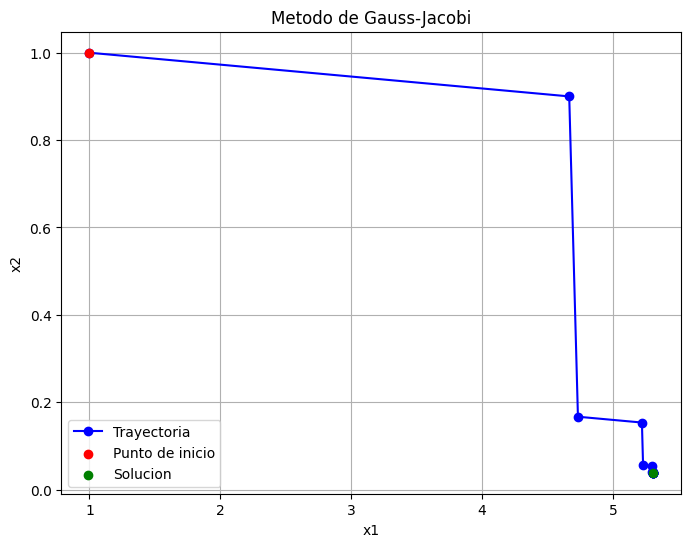

In [65]:
Jacobi = np.array([x.flatten() for x in Jacobi])
# Graficar
plt.figure(figsize=(8, 6))
plt.plot(Jacobi[:, 0], Jacobi[:, 1], marker='o', color='b', label='Trayectoria')
plt.scatter(x0[0], x0[1], color='r', label='Punto de inicio', zorder=5)
plt.scatter(solucionJacobi[0], solucionJacobi[1], color='g', label='Solucion', zorder=5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Metodo de Gauss-Jacobi')

plt.legend()
plt.grid(True)
plt.show()

# #Zoom
# plt.xlim(-3, 0.0)  # Rango para el eje x 
# plt.ylim(-1.0, 5)  # Rango para el eje y 


---

## Con valores $x_0 = [5, -2]$

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Converge
#A1 = np.array([[3, 2], [2, 10]])

# Diverge
A1 = np.array([[2, 10], [3, 2]])
b1 = np.array([16, 11])
x0_1 = np.array([5, -2])
tol1 = 1e-6
max_iter1 = 1000

solucionJacobix0_1, Jacobix0_1 = gauss_jacobi(A=A1, b=b1, x0=x0_1, tol=tol1, max_iter=max_iter1)

print("Solución del sistema:")
for i, valor in enumerate(solucionJacobix0_1.flatten()):
    print(f"x{i + 1} = {valor:.6f}")

[01-25 20:00:20][INFO] i= 0 x: [ 5 -2]
[01-25 20:00:20][INFO] i= 1 x: [[18. -2.]]
[01-25 20:00:20][INFO] i= 2 x: [[ 18.  -21.5]]
[01-25 20:00:20][INFO] i= 3 x: [[115.5 -21.5]]
[01-25 20:00:20][INFO] i= 4 x: [[ 115.5  -167.75]]
[01-25 20:00:20][INFO] i= 5 x: [[ 846.75 -167.75]]
[01-25 20:00:20][INFO] i= 6 x: [[  846.75  -1264.625]]
[01-25 20:00:20][INFO] i= 7 x: [[ 6331.125 -1264.625]]
[01-25 20:00:20][INFO] i= 8 x: [[ 6331.125  -9491.1875]]
[01-25 20:00:20][INFO] i= 9 x: [[47463.9375 -9491.1875]]
[01-25 20:00:20][INFO] i= 10 x: [[ 47463.9375  -71190.40625]]
[01-25 20:00:20][INFO] i= 11 x: [[355960.03125 -71190.40625]]
[01-25 20:00:20][INFO] i= 12 x: [[ 355960.03125  -533934.546875]]
[01-25 20:00:20][INFO] i= 13 x: [[2669680.734375 -533934.546875]]
[01-25 20:00:20][INFO] i= 14 x: [[ 2669680.734375  -4004515.6015625]]
[01-25 20:00:20][INFO] i= 15 x: [[20022586.0078125 -4004515.6015625]]
[01-25 20:00:20][INFO] i= 16 x: [[ 20022586.0078125  -30033873.51171875]]
[01-25 20:00:20][INFO] i= 17

C:\Users\auber\AppData\Local\Temp\ipykernel_14268\2892209730.py:68: RuntimeWarning: overflow encountered in multiply
  suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
C:\Users\auber\AppData\Local\Temp\ipykernel_14268\2892209730.py:71: RuntimeWarning: invalid value encountered in subtract
  if np.linalg.norm(x_new - x) < tol:


[01-25 20:00:21][INFO] i= 794 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 795 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 796 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 797 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 798 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 799 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 800 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 801 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 802 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 803 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 804 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 805 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 806 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 807 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 808 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 809 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 810 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 811 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 812 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 813 x: [[ inf -inf]]
[01-25 20:00:21][INFO] i= 814 x: [[ inf -inf]]
[01-25 20:00:

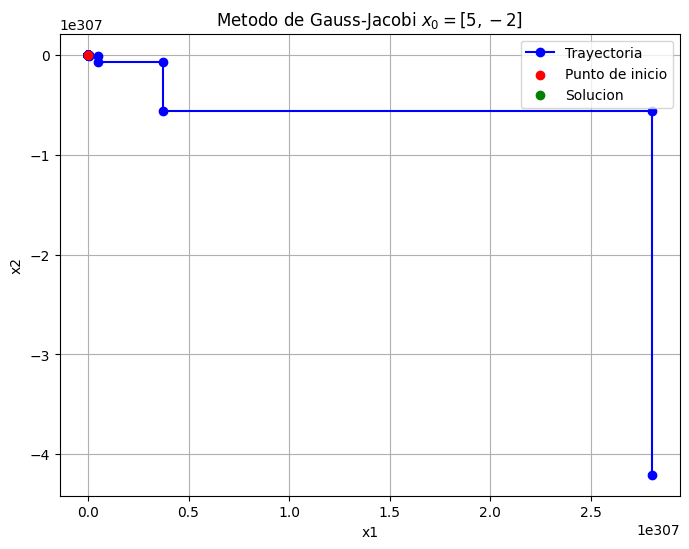

In [67]:
Jacobix0_1 = np.array([x.flatten() for x in Jacobix0_1])
# Graficar
plt.figure(figsize=(8, 6))
plt.plot(Jacobix0_1[:, 0], Jacobix0_1[:, 1], marker='o', color='b', label='Trayectoria')
plt.scatter(x0_1[0], x0_1[1], color='r', label='Punto de inicio', zorder=5)
plt.scatter(solucionJacobix0_1[0], solucionJacobix0_1[1], color='g', label='Solucion', zorder=5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Metodo de Gauss-Jacobi $x_0 = [5, -2]$')

plt.legend()
plt.grid(True)
plt.show()

# #Zoom
# plt.xlim(-3, 0.0)  # Rango para el eje x 
# plt.ylim(-1.0, 5)  # Rango para el eje y 

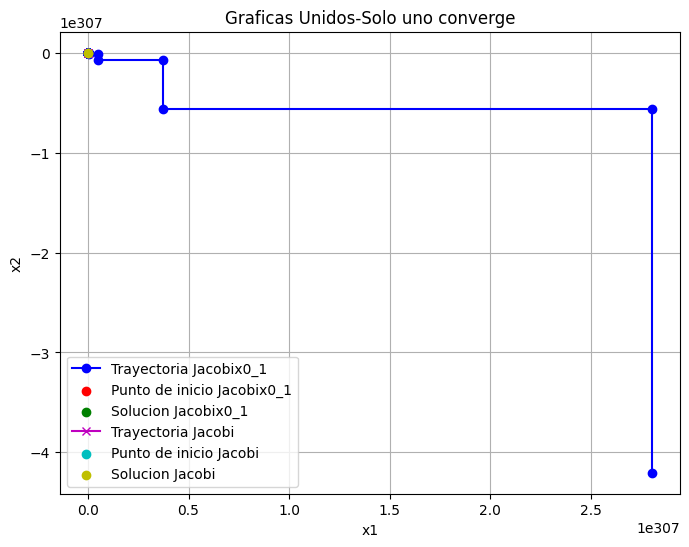

In [68]:
Jacobix0_1 = np.array([x.flatten() for x in Jacobix0_1])
Jacobi = np.array([x.flatten() for x in Jacobi])

# Graficar
plt.figure(figsize=(8, 6))

# Graficar la trayectoria de Jacobix0_1
plt.plot(Jacobix0_1[:, 0], Jacobix0_1[:, 1], marker='o', color='b', label='Trayectoria Jacobix0_1')
plt.scatter(x0_1[0], x0_1[1], color='r', label='Punto de inicio Jacobix0_1', zorder=5)
plt.scatter(solucionJacobix0_1[0], solucionJacobix0_1[1], color='g', label='Solucion Jacobix0_1', zorder=5)

# Graficar la trayectoria de Jacobi
plt.plot(Jacobi[:, 0], Jacobi[:, 1], marker='x', color='m', label='Trayectoria Jacobi')
plt.scatter(x0[0], x0[1], color='c', label='Punto de inicio Jacobi', zorder=5)
plt.scatter(solucionJacobi[0], solucionJacobi[1], color='y', label='Solucion Jacobi', zorder=5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Graficas Unidos-Solo uno converge')

plt.legend()
plt.grid(True)
plt.show()

# Gauss-Seidel

In [52]:
# Converge
A2 = np.array([[3, 2], [2, 10]])

# Diverge
#A2 = np.array([[2, 10], [3, 2]])
b2 = np.array([11, 16])
x0_2 = np.array([1, 1])
tol2 = 1e-6
max_iter2 = 1000

solucionSeidel2, seidel2 = gauss_seidel(A=A2, b=b2, x0=x0_2, tol=tol2, max_iter=max_iter2)

print("Solución del sistema:")
for i, valor in enumerate(solucionSeidel2.flatten()):
    print(f"x{i + 1} = {valor:.6f}")

[01-25 19:57:53][INFO] i= 0 x: [1 1]
[01-25 19:57:53][INFO] i= 1 x: [[3. 1.]]
Solución del sistema:
x1 = 3.000000
x2 = 1.000000


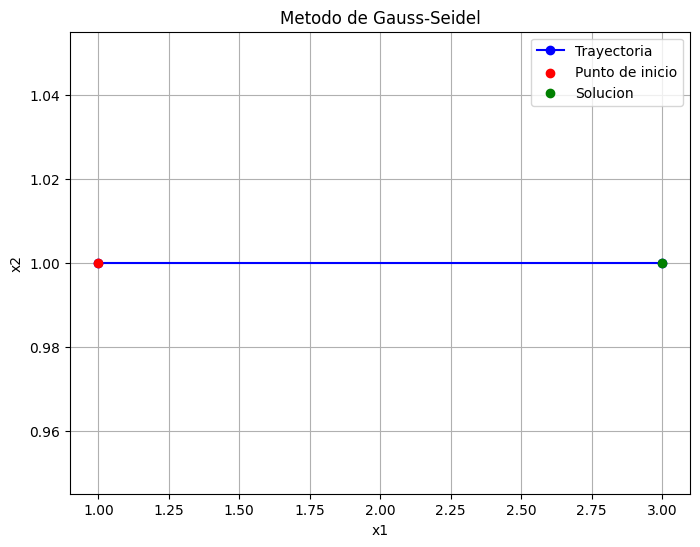

In [53]:
seidel2 = np.array([x.flatten() for x in seidel2])
# Graficar
plt.figure(figsize=(8, 6))
plt.plot(seidel2[:, 0], seidel2[:, 1], marker='o', color='b', label='Trayectoria')
plt.scatter(x0_2[0], x0_2[1], color='r', label='Punto de inicio', zorder=5)
plt.scatter(solucionSeidel2[0], solucionSeidel2[1], color='g', label='Solucion', zorder=5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Metodo de Gauss-Seidel')

plt.legend()
plt.grid(True)
plt.show()

---

## Con valores $x_0 = [5, -2]$

In [54]:
# Converge
A3 = np.array([[3, 2], [2, 10]])

# Diverge
#A3 = np.array([[2, 10], [3, 2]])
b3 = np.array([11, 16])
x0_3 = np.array([5, -2])
tol3 = 1e-6
max_iter3 = 1000

solucionSeidelx0_3, seidelx0_3 = gauss_seidel(A=A3, b=b3, x0=x0_3, tol=tol3, max_iter=max_iter3)

print("Solución del sistema:")
for i, valor in enumerate(solucionSeidelx0_3.flatten()):
    print(f"x{i + 1} = {valor:.6f}")

[01-25 19:58:06][INFO] i= 0 x: [ 5 -2]
[01-25 19:58:06][INFO] i= 1 x: [[5.  0.6]]
[01-25 19:58:06][INFO] i= 2 x: [[3.26666667 0.94666667]]
[01-25 19:58:06][INFO] i= 3 x: [[3.03555556 0.99288889]]
[01-25 19:58:06][INFO] i= 4 x: [[3.00474074 0.99905185]]
[01-25 19:58:06][INFO] i= 5 x: [[3.0006321  0.99987358]]
[01-25 19:58:06][INFO] i= 6 x: [[3.00008428 0.99998314]]
[01-25 19:58:06][INFO] i= 7 x: [[3.00001124 0.99999775]]
[01-25 19:58:06][INFO] i= 8 x: [[3.0000015 0.9999997]]
[01-25 19:58:06][INFO] i= 9 x: [[3.0000002  0.99999996]]
Solución del sistema:
x1 = 3.000000
x2 = 1.000000


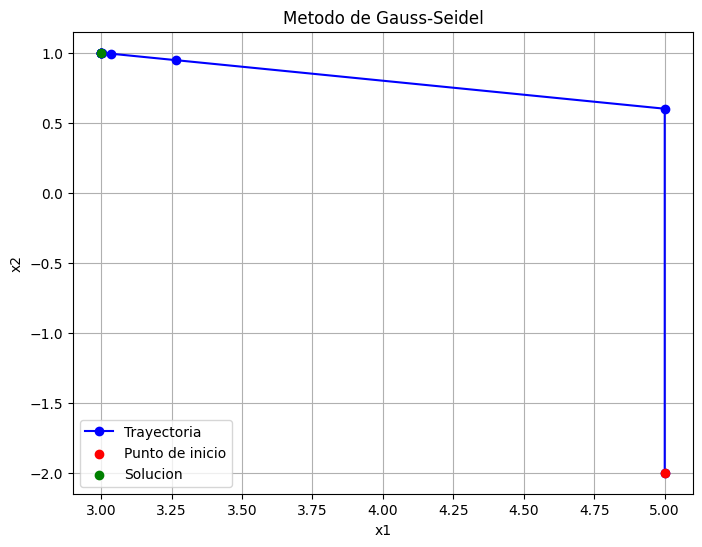

In [55]:
seidelx0_3 = np.array([x.flatten() for x in seidelx0_3])
# Graficar
plt.figure(figsize=(8, 6))
plt.plot(seidelx0_3[:, 0], seidelx0_3[:, 1], marker='o', color='b', label='Trayectoria')
plt.scatter(x0_3[0], x0_3[1], color='r', label='Punto de inicio', zorder=5)
plt.scatter(solucionSeidelx0_3[0], solucionSeidelx0_3[1], color='g', label='Solucion', zorder=5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Metodo de Gauss-Seidel')

plt.legend()
plt.grid(True)
plt.show()

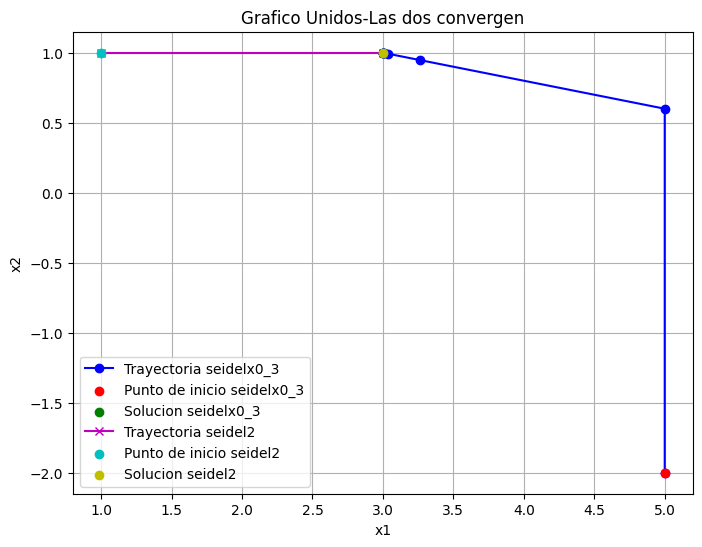

In [57]:
seidelx0_3 = np.array([x.flatten() for x in seidelx0_3])
seidel2 = np.array([x.flatten() for x in seidel2])

# Graficar
plt.figure(figsize=(8, 6))

# Graficar la trayectoria de seidelx0_3
plt.plot(seidelx0_3[:, 0], seidelx0_3[:, 1], marker='o', color='b', label='Trayectoria seidelx0_3')
plt.scatter(x0_3[0], x0_3[1], color='r', label='Punto de inicio seidelx0_3', zorder=5)
plt.scatter(solucionSeidelx0_3[0], solucionSeidelx0_3[1], color='g', label='Solucion seidelx0_3', zorder=5)

# Graficar la trayectoria de seidel2
plt.plot(seidel2[:, 0], seidel2[:, 1], marker='x', color='m', label='Trayectoria seidel2')
plt.scatter(x0_2[0], x0_2[1], color='c', label='Punto de inicio seidel2', zorder=5)
plt.scatter(solucionSeidel2[0], solucionSeidel2[1], color='y', label='Solucion seidel2', zorder=5)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Grafico Unidos-Las dos convergen')

plt.legend()
plt.grid(True)
plt.show()